#### REDI ML: PROJECT ONE (PART A)
##### "Project-based North American pumpkin prices (Visualize and clean data in preparation for ML)"
##### Date: September 21, 2022

In [1]:
import pandas as pd
import os 

#import requests 
#import io

In [2]:
cwd = os.getcwd()
print(cwd)

C:\Users\Mercy Akinloye\Desktop\CODE\Jupyter\RediML_P1


In [3]:
#to get data from Github
#url = "https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/US-pumpkins.csv"
#download = requests.get(url).content

In [4]:
pumpkins = pd.read_csv("C:/Users/Mercy Akinloye/Desktop/CODE/Jupyter/RediML_P1/ML-For-Beginners/2-Regression/data/US-pumpkins.csv", encoding = 'utf-8')
pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


###### DATA PREPARATION

In [5]:
#check for missing data
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [6]:
!pip install seaborn

In [7]:
import seaborn as sns

<AxesSubplot: >

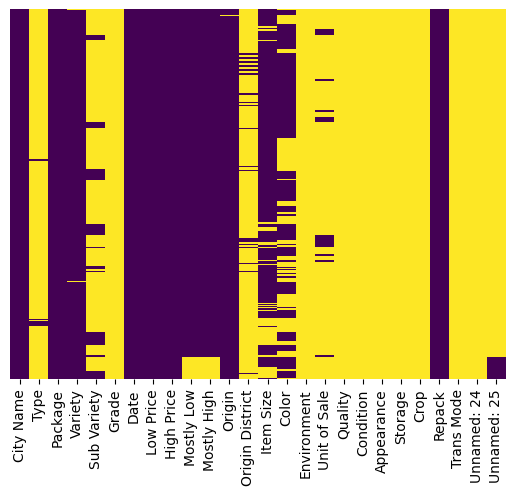

In [8]:
#figure for data visualization
#yellow = null values
sns.heatmap(pumpkins.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### DATA PREPROCESSING I
- DATAFRAME: PUMPKINS
- Drop columns
- Change Date --> Month
- Filter package to include just bushels
- Calculate average price (avg_price)
- Create new dataframe (new_pumpkins) 

In [9]:
#drop columns
#called 'list comprehension'
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [10]:
#cleaning data II: pumpkins package is recorded in different units 
#filter dataset so that package only contain 'bushel'

## what does regex mean
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [11]:
#What does this code mean -> yu get month from date

month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Int64Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=415)


In [12]:
avg_price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
print(avg_price)

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64


In [13]:
print(pumpkins)

                   Package     Date  Low Price  High Price
70    1 1/9 bushel cartons  9/24/16      15.00        15.0
71    1 1/9 bushel cartons  9/24/16      18.00        18.0
72    1 1/9 bushel cartons  10/1/16      18.00        18.0
73    1 1/9 bushel cartons  10/1/16      17.00        17.0
74    1 1/9 bushel cartons  10/8/16      15.00        15.0
...                    ...      ...        ...         ...
1738    1/2 bushel cartons  9/30/16      15.00        15.0
1739    1/2 bushel cartons  9/30/16      13.75        15.0
1740    1/2 bushel cartons  9/30/16      10.75        15.0
1741    1/2 bushel cartons  9/30/16      12.00        12.0
1742    1/2 bushel cartons  9/30/16      12.00        12.0

[415 rows x 4 columns]


##### DATA PREPROCESSING II
- DATAFRAME: PUMPKINS 2
- pumpkins + avg_price

In [14]:
#New dataframe with the information that we want

new_pumpkins = pd.DataFrame({'Month':month, 'Package':pumpkins['Package'], 'Low Price':pumpkins['Low Price'], 'High Price':pumpkins['High Price'], 'Average Price': avg_price  })
print(new_pumpkins)

      Month               Package  Low Price  High Price  Average Price
70        9  1 1/9 bushel cartons      15.00        15.0         15.000
71        9  1 1/9 bushel cartons      18.00        18.0         18.000
72       10  1 1/9 bushel cartons      18.00        18.0         18.000
73       10  1 1/9 bushel cartons      17.00        17.0         17.000
74       10  1 1/9 bushel cartons      15.00        15.0         15.000
...     ...                   ...        ...         ...            ...
1738      9    1/2 bushel cartons      15.00        15.0         15.000
1739      9    1/2 bushel cartons      13.75        15.0         14.375
1740      9    1/2 bushel cartons      10.75        15.0         12.875
1741      9    1/2 bushel cartons      12.00        12.0         12.000
1742      9    1/2 bushel cartons      12.00        12.0         12.000

[415 rows x 5 columns]


In [15]:
#check for missing data - again
new_pumpkins.isnull().sum()

Month            0
Package          0
Low Price        0
High Price       0
Average Price    0
dtype: int64

In [16]:
#for package -> brushels is for 1 1/9 or for 1/2, need to standardize prices to be per 1 brushel

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Average Price'] = avg_price / (1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Average Price'] = avg_price / (1/2)

In [17]:
print(new_pumpkins)

      Month               Package  Low Price  High Price  Average Price
70        9  1 1/9 bushel cartons      15.00        15.0          13.50
71        9  1 1/9 bushel cartons      18.00        18.0          16.20
72       10  1 1/9 bushel cartons      18.00        18.0          16.20
73       10  1 1/9 bushel cartons      17.00        17.0          15.30
74       10  1 1/9 bushel cartons      15.00        15.0          13.50
...     ...                   ...        ...         ...            ...
1738      9    1/2 bushel cartons      15.00        15.0          30.00
1739      9    1/2 bushel cartons      13.75        15.0          28.75
1740      9    1/2 bushel cartons      10.75        15.0          25.75
1741      9    1/2 bushel cartons      12.00        12.0          24.00
1742      9    1/2 bushel cartons      12.00        12.0          24.00

[415 rows x 5 columns]


##### VISUALIZATION

In [18]:
import matplotlib.pyplot as plt

In [19]:
APrice = new_pumpkins['Average Price']

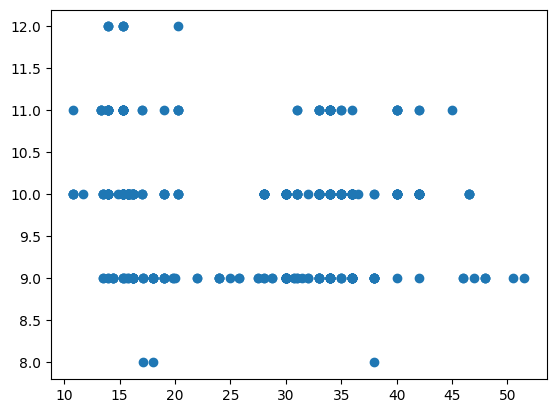

In [20]:
price = APrice
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

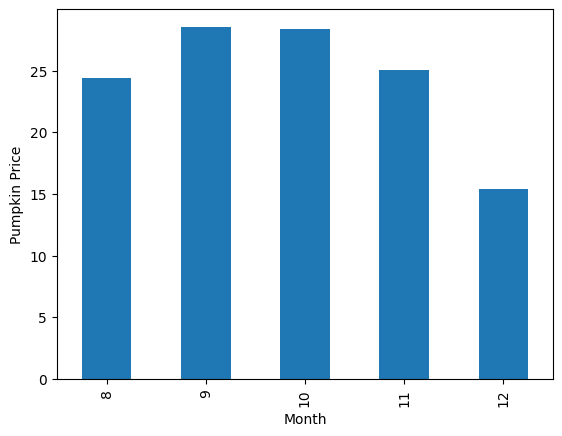

In [21]:
new_pumpkins.groupby(['Month'])['Average Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

Text(0, 0.5, 'Pumpkin Price')

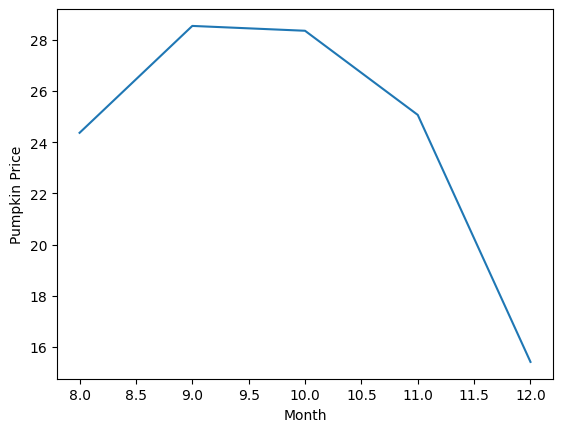

In [22]:
new_pumpkins.groupby(['Month'])['Average Price'].mean().plot(kind='line')
plt.ylabel("Pumpkin Price")

### Project Continuation...

#### LINEAR & POLYNOMIAL REGRESSION (Date: Sep 26, 2022)
#### LOGISTIC REGRESSION (Date: Oct 5, 2022)